<a href="https://colab.research.google.com/github/victormazevedo/predict-financial-fraud/blob/master/Predict_Financial_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Financial Fraud with Data Science Analysis

![alt text](http://www.fatecrp.edu.br/wp-content/themes/fatecrp/dist/img/logo.png)

This is a final-project destinated to Analise e Densenvolvimento de Sistema's course of Fatec Ribeirão Preto

O seguinte projeto é destinado ao trabalho de conclusão de curso do curso de Análise e Desenvolvimento de Sistemas da Fatec Ribeirão Preto. O tema deste projeto é Detecção Automática de Fraude Financeira utilizando Data Science.

Para isto, utilizarei um [dataset](https://www.kaggle.com/ntnu-testimon/paysim1) presente no site [Kaggle](https://kaggle.com).
Este dataset simula transações realizadas via mobile com base em uma amostra de um mês inteiro, disponibilizado por um grande serviço de banco digital da África. Este mesmo serviço também existe em 14 países.
O dataset disponibilizado no Kaggle representa 1/4 do dataset original.

## Import do dataset



In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 20)
!wget 'https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0'
df = pd.read_csv('PS_20174392719_1491204439457_log.csv?dl=0')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--2020-05-09 21:51:51--  https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv [following]
--2020-05-09 21:51:51--  https://www.dropbox.com/s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce0d173eb0a487aaaf900b57fab.dl.dropboxusercontent.com/cd/0/inline/A3Zd2R7i5lpVfNR4HygMcboOPCR0Pr8Kg03JxeRocCDmmA4e6lqbwQQ7ZIh6B2gQzUfHma71it7EkQa7rDEHDvCCV0mypF2EY0Nig_v784gN_fIROv_SHNQ-fX-d7qm79Uw/file# [following]
--2020-05-09 21:51:51--  https://uce0d173eb0a487aaaf900b57fab.dl.dropboxusercontent.com/cd/0/inline/A3Zd2R7i5lpVfNR4HygMcboOPCR0Pr8Kg0

In [2]:
  df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Explicando cada coluna e seus dados

Ao executar o _info_, conseguimos visualizar

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


Ao executar o comando acima, nota-se que são retornados 6.362.619 registros. Cada coluna representa o seguinte:

* step - mapeia a unidade de tempo no mundo real.

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - total da transação na moeda local.

* nameOrig - cliente que começou a transação.

* oldbalanceOrg - saldo inicial antes da transação.

* newbalanceOrig - saldo final depois da transação.

* nameDest - cliente que recebeu a transação (destinatário/favorecido).

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#verifying if exists null values in dataframe
df.isna().values.any()
df.isna().sum(0).sort_values(ascending = False)

isFlaggedFraud    0
isFraud           0
newBalanceDest    0
oldBalanceDest    0
nameDest          0
newBalanceOrig    0
oldBalanceOrig    0
nameOrig          0
amount            0
type              0
step              0
dtype: int64

# Explorando e Analisando os dados

### Que tipos de transações são fraudulentas?

In [6]:
print("Os tipos de transações fraudulentas são: {} ".format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))
fraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
fraudCashOut = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print("O número de TRANSFERS fraudulentas é: {}".format(len(fraudTransfer)))
print("O número de CASH_OUT(SAQUES) é: {}".format(len(fraudCashOut)))

Os tipos de transações fraudulentas são: ['TRANSFER', 'CASH_OUT'] 
O número de TRANSFERS fraudulentas é: 4097
O número de CASH_OUT(SAQUES) é: 4116


## O que determina uma transação ser marcada como _isFlaggedFraud_?

In [7]:
countIsFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]
print("O número de transações marcadas como isFlaggedFraud é: {} ".format(len(countIsFlaggedFraud)))

print("O tipo de transações que estão flagadas com isFlaggedFraud é: {}".format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nValor minimo transacionado quando a flag esta ativa: ${}'.format(dfFlagged.amount.min()))
print('\nValor maximo quando a flag estava inativa: ${}'.format(dfNotFlagged.amount.max()))

O número de transações marcadas como isFlaggedFraud é: 16 
O tipo de transações que estão flagadas com isFlaggedFraud é: ['TRANSFER']

Valor minimo transacionado quando a flag esta ativa: $353874.22

Valor maximo quando a flag estava inativa: $92445516.64


In [8]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldBalanceDest == 0) & (dfTransfer.newBalanceDest == 0)])))


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


In [9]:
print(f'\nMin e Max da oldBalanceOrig pra flaggedFraud = 1 TRANSFERS {round(dfFlagged.oldBalanceOrig.min()), round(dfFlagged.oldBalanceOrig.max())}')

dfTransferEqualBalance = dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceOrig == dfTransfer.newBalanceOrig)]
print(f'\nMin e Max da oldBalanceOrig pra flaggedFraud = 0 pra quando oldBalanceOrig \
for igual a newBalanceOrig {round(dfTransferEqualBalance.oldBalanceOrig.min()), round(dfTransferEqualBalance.oldBalanceOrig.max())}')


Min e Max da oldBalanceOrig pra flaggedFraud = 1 TRANSFERS (353874, 19585040)

Min e Max da oldBalanceOrig pra flaggedFraud = 0 pra quando oldBalanceOrig for igual a newBalanceOrig (0, 575668)


## Há contas marcadas normais para TRANSFERs e CASH_OUTs fraudulentos?

Pela descrição do dataset, as fraudes acontecem primeiro com uma TRANSFER para uma conta fraudulenta, e esta conta ao receber o dinheiro realiza uma operaçãão de CASH_OUT. CASH_OUT envolve transacionar com um comerciante que paga em dinheiro. Contudo, com este comportamento citado acima, a conta fraudulenta pode ser ambas, o destino em uma TRANSFER e quem deu origem ao CASH_OUT.

In [10]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print(f'Há contas que foram o destino da TRANSFER que também gerou a CASH_OUT? \
{dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig).any()}')

Há contas que foram o destino da TRANSFER que também gerou a CASH_OUT? False


In [11]:
dfNotFraud = df.loc[(df.isFraud == 0)]
print('\nTRANSFERs fraudulentas no qual a conta de destino era geradora genuina de CASH_OUTs\
: \n\n{}'.format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


TRANSFERs fraudulentas no qual a conta de destino era geradora genuina de CASH_OUTs: 

         step      type      amount     nameOrig  oldBalanceOrig  \
1030443    65  TRANSFER  1282971.57  C1175896731      1282971.57   
6039814   486  TRANSFER   214793.32  C2140495649       214793.32   
6362556   738  TRANSFER   814689.88  C2029041842       814689.88   

         newBalanceOrig     nameDest  oldBalanceDest  newBalanceDest  isFraud  \
1030443             0.0  C1714931087             0.0             0.0        1   
6039814             0.0   C423543548             0.0             0.0        1   
6362556             0.0  C1023330867             0.0             0.0        1   

         isFlaggedFraud  
1030443               0  
6039814               0  
6362556               0  


In [12]:

#numero de transações marcadas como isFraud
countIsFraud = df.loc[(df.isFraud == 1)]
print(f'o número de transações marcadas como isFraud é: {len(countIsFraud)}')

o número de transações marcadas como isFraud é: 8213


In [13]:
#porque temos transações em que não bate o número?
print('Checking if amount - oldBalanceOrig == newBalanceOrig')
dfCheckBalance = df.loc[(df.oldBalanceOrig - df.amount) != df.newBalanceOrig]

Checking if amount - oldBalanceOrig == newBalanceOrig


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<function matplotlib.pyplot.show>

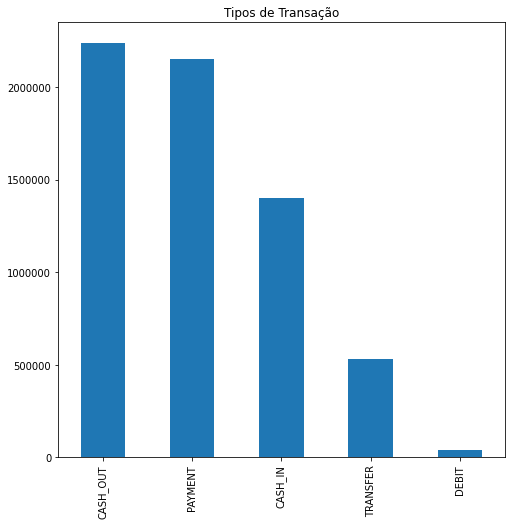

In [14]:
values = df.type.value_counts()
print(values)

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
values.plot(kind='bar', title='Tipos de Transação', ax=ax)
#retirando notação científica
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show

# Limpeza dos dados

Depois de ter realizado a análise de dados acima, percebemos que as fraudes somente acontetem em TRANSFERS e CASH_OUTS. Desta forma reunirei apenas os dados relevantes

In [15]:
# selecionando apenas transfers e cashout
cleanedDf = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
print(cleanedDf.shape)

(2770409, 11)


In [16]:
dummy = cleanedDf['isFraud']
del cleanedDf['isFraud']
print(cleanedDf.shape)

(2770409, 10)


In [17]:
#eliminando colunas irrelevantes
cleanedDf = cleanedDf.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
print(cleanedDf.shape)

(2770409, 7)


In [0]:
# realizando o binary-encoding dos dados
cleanedDf['type'] = cleanedDf['type'].map({
    'TRANSFER': 0,
    'CASH_OUT': 1
})

In [19]:
cleanedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldBalanceOrig  float64
 4   newBalanceOrig  float64
 5   oldBalanceDest  float64
 6   newBalanceDest  float64
dtypes: float64(5), int64(2)
memory usage: 169.1 MB


## Eliminação de valores ausentes

In [20]:
fraud = cleanedDf.loc[dummy == 1]
nonFraud = cleanedDf.loc[dummy == 0]
percentageOfFraudulent = (len(fraud.loc[(fraud.oldBalanceDest == 0) & \
(fraud.newBalanceDest == 0) & (fraud.amount)]) / (1.0 * len(fraud)))
print(f"\nA porcentagem de transações fraudulentas com \'oldBalanceDest\' = \
\'newBalanceDest\'= 0 embora o \'amount\' não é zero: {percentageOfFraudulent}")


A porcentagem de transações fraudulentas com 'oldBalanceDest' = 'newBalanceDest'= 0 embora o 'amount' não é zero: 0.4955558261293072


In [21]:
percentageNonFraud = (len(nonFraud.loc[(nonFraud.oldBalanceDest == 0) & \
(nonFraud.newBalanceDest == 0) & (nonFraud.amount)]) / (1.0 * len(nonFraud)))
print(f"\nA porcentagem de transações não fraudulentas com \'oldBalanceDest\' = \
\'newBalanceDest\'= 0 embora o \'amount\' não é zero: {percentageNonFraud}")


A porcentagem de transações não fraudulentas com 'oldBalanceDest' = 'newBalanceDest'= 0 embora o 'amount' não é zero: 0.0006176245277308345


Um dos maiores indicadores de transações fraudulentas é o saldo da conta de destino estar zerado, como mostrado acima. Deste modo, para facilitar o processo de ML, alterarei os valores de saldo zerado pra -1

In [0]:
cleanedDf.loc[(cleanedDf.oldBalanceDest == 0) & (cleanedDf.newBalanceDest == 0) & (cleanedDf.amount != 0), \
['oldBalanceDest', 'newBalanceDest']] = -1

Também há várias transações em que os saldos da conta de origem são zeros. Pelo mesmo motivo acima, decidi alterá-los com null.

In [0]:
cleanedDf.loc[(cleanedDf.oldBalanceOrig == 0) & (cleanedDf.newBalanceOrig == 0) & (cleanedDf.amount != 0), \
['oldBalanceOrig', 'newBalanceOrig']] = np.nan

In [24]:
cleanedDf.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


# Feature-engineering

Para aumentar a assertividade da solução de ML, criarei uma nova coluna no dataset chamada de `errorBalanceOrig` e `errorBalanceDest`

In [0]:
cleanedDf['errorBalanceOrig'] = cleanedDf.newBalanceOrig + cleanedDf.amount - cleanedDf.oldBalanceOrig
cleanedDf['errorBalanceDest'] = cleanedDf.oldBalanceDest + cleanedDf.amount - cleanedDf.newBalanceDest

In [27]:
cleanedDf.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,-1.0,-1.00,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0


# Visualização dos dados

Sabemos que a melhor maneira para realmente confirmar as análises realizadas acima, é visualizar estes dados para assim obtermos maior precisão nas análises, e se necessário até mesmo realizar algumas modificações para melhorá-los.

In [0]:
limit = len(cleanedDf)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['TRANSFER', 'CASH_OUT'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

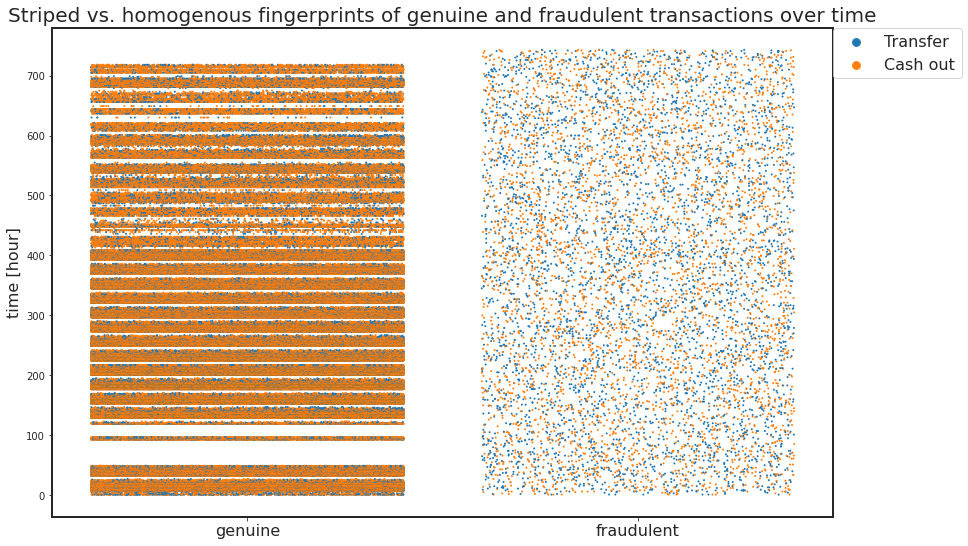

In [33]:
ax = plotStrip(dummy[:limit], cleanedDf.step[:limit], cleanedDf.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);